In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Simulated customer spend data
ad_a_spend = np.random.normal(loc=250, scale=40, size=50)  # Ad A group
ad_b_spend = np.random.normal(loc=270, scale=45, size=50)  # Ad B group

# Create dataframe
df = pd.DataFrame({
    'Customer_ID': range(1, 101),
    'Ad_Type': ['Ad_A']*50 + ['Ad_B']*50,
    'Spending': np.concatenate([ad_a_spend, ad_b_spend])
})
df['Spending'] = df['Spending'].round(2)
df.head()

Customer_ID Ad_Type  Spending
0            1    Ad_A    269.87
1            2    Ad_A    244.47
2            3    Ad_A    275.91
3            4    Ad_A    310.92
4            5    Ad_A    240.63

<Axes: ylabel='Count'>

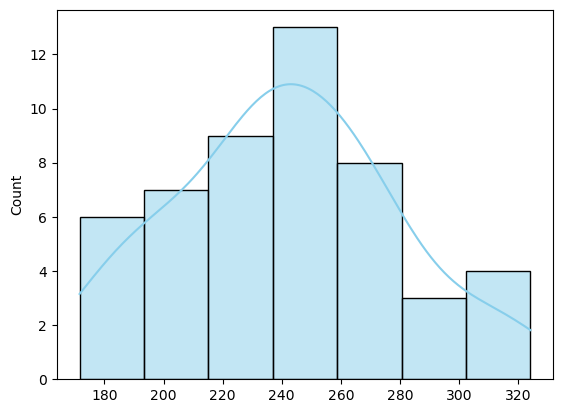

In [3]:
# In real world dataset, I have to check if the dataset is normal or not as 2 sample t test 
# is a CLT based test.
import seaborn as sns
sns.histplot(ad_a_spend,kde=True,color='skyblue')

In [5]:
# comparing quantiles

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([171.61319504, 173.46879021, 179.47839379, 181.0032867 ,
         190.85912039, 193.01007255, 193.50785195, 196.87255804,
         201.166254  , 203.9602569 , 207.69156284, 209.48675519,
         213.67903698, 221.20623166, 225.93173551, 225.9744524 

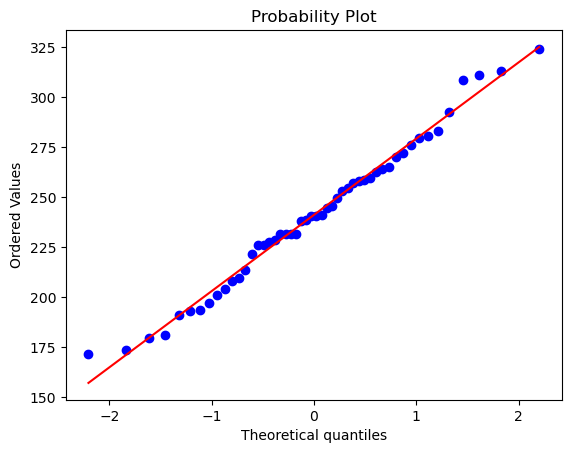

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(ad_a_spend,dist='norm',plot=plt)

<Axes: ylabel='Count'>

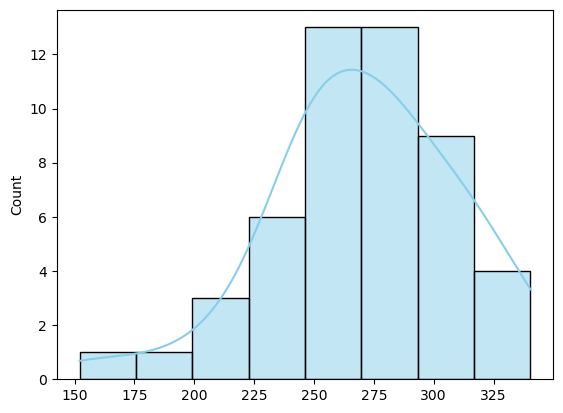

In [9]:
# Repeating the same steps for ad B spend
sns.histplot(ad_b_spend,kde=True,color='skyblue')

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([152.11147032, 180.55939884, 204.14182733, 216.17070192,
         220.21492617, 232.23521145, 233.61778787, 238.40761078,
         239.53850999, 240.96961104, 246.16079083, 246.67784018,
         247.42093304, 248.4371593 , 252.35513311, 252.67129738

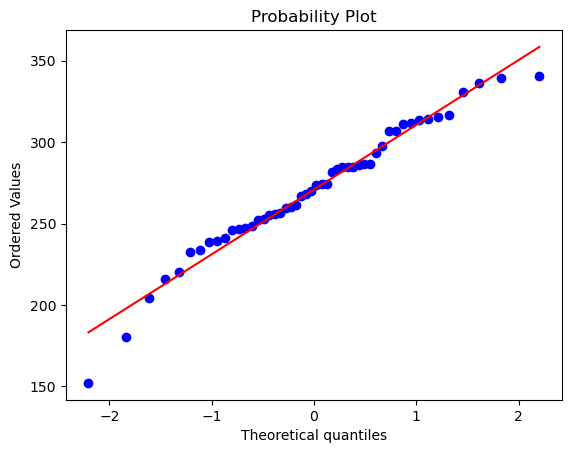

In [11]:
stats.probplot(ad_b_spend,dist='norm',plot=plt)

In [13]:
# checking for equal variance:
from scipy.stats import levene
stat, p_value = levene(ad_a_spend, ad_b_spend)
print(f"Levene’s Test p-value: {p_value}")

Levene’s Test p-value: 0.8219252528684073


In [15]:
# Fail to reject null hypothesis as p value is > 0.05 => equal variances => proceed to use standard t test.

In [17]:
t_stat,p_value=stats.ttest_ind(ad_a_spend,ad_b_spend)
print(f'the t_stat is {t_stat:.2f}')
print(f'p value is {p_value:.6f}')

the t_stat is -3.89
p value is 0.000185


so from t_stat we can see that mean of ad A spend is less than mean of ad B spend and the p value
is suggesting that this difference is statistically significant and Ad B significantly increased customer spending.